# This project is to explore the Neflix dataset from Kaggle.

## These are the steps I followed.

### 1. Inspection of the file or files
* to see what the dataset is about and what kind of insight can be derived.
* to see if the dataset has info we need to research
* To see the format and type of data and how to import it properly e.g. Unicode.

### 2. Initial Observations
* We have one file so we need only one dataframe and no need to merge any data.
* The file contains characters other than the basic english characters, so we need to import it using the 'r' in the read_csv command.
* Some column types are not consistent with the information in them e.g. Duration.
* The description column may not be useful for the analysis so we may have to drop it.
* Some rows have nulls, we will determine to what extent they affect the dataset and if we will drop them during the cleaning. 

### 3. Import Data into Jupyter Notebook.
* I used pandas also using r to take care of the unicode in the .csv file.


In [2]:
# first we get the working directory and save files there
import os

In [3]:
os.getcwd()

'C:\\Users\\IPHIE'

In [4]:
import pandas as pd

In [5]:
Mdata=pd.read_csv(r"MovieData.csv")

In [6]:
Mdata

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### 4. Explore Data

* To have more information about dataframe we apply Mdata.info()

* I'll use this command as it puts all the results of : Mdata.shape, len(Mdata) ,Mdata.columns ,Mdata.dtypes and Mdata.values in one place.

In [16]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


* The column with the most number of missing values is the director column
* Country also has missing values
*  Date added needs to be in Date_time
* Duration needs to be in Integer
*  We need to drop Show_id as it many not be useful

In [11]:
Mdata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
Mdata.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [18]:
Mdata.shape

(7787, 12)

 ### 5a. Next we move to Data Cleaning. Here we will do the following:
 * Check that there are no duplicate records
 * Remove irrelevant pieces of data 
 * Identify missing of data and determine how they affect the overall set.
 * Modifying incorrect data especially noting the types. 

In [21]:
Mdata[Mdata.duplicated()]        #This outputs any data row that has duplicates. This shows there are no duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
Mdata.drop(['show_id'],axis=1,inplace=True)     #This drops the show_id column as it is not useful in this analysis. 

In [30]:
Mdata.head()   #COnfirming it was dropped 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [38]:
# To identify the null values aggregated by column , we use the isnull().sum() function
Mdata.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### 5b. To treat missing values, since there are quite a number, we cannot delete them. 
We use the imputation method for the director, cast and rating.
The fillna function from Pandas helps with this by marking those records as unavailable so we do not lose the rest of the info that makes up the rows. 

In [39]:
Mdata.director.fillna("No Director", inplace=True)
Mdata.cast.fillna("No Cast", inplace=True)
Mdata.dropna(subset=["date_added", "rating"], inplace=True)

In [40]:
Mdata.isnull().sum()   # This confirms the 3 columns have been treated accurately. 

type              0
title             0
director          0
cast              0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
 # This confirms the 3 columns have been treated accurately. 

In [41]:
Mdata.country.value_counts()  #For the country, we will look at which country appears the most and assume the missing values belong to that country.

United States                             2546
India                                      923
United Kingdom                             396
Japan                                      224
South Korea                                183
                                          ... 
Singapore, Japan, France                     1
Belgium, United Kingdom, United States       1
United Kingdom, Belgium, Sweden              1
Denmark, France, Poland                      1
United Kingdom, Spain                        1
Name: country, Length: 681, dtype: int64

In [42]:
Mdata.country.fillna(value="United States",inplace=True) #Since United states appears the most, we will assign all blank values in the column 'Country' to 'United States'

In [43]:
Mdata.isnull().sum()   # This confirms all blanks have been treated. 

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [32]:
Mdata['date_added']=pd.to_datetime(Mdata['date_added'],errors='coerce')     #converting to Dtype of Date_added from object to datetime format

In [33]:
Mdata.info()    #confirming it was changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7787 non-null   object        
 1   title         7787 non-null   object        
 2   director      5398 non-null   object        
 3   cast          7069 non-null   object        
 4   country       7280 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7787 non-null   int64         
 7   rating        7780 non-null   object        
 8   duration      7787 non-null   object        
 9   listed_in     7787 non-null   object        
 10  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 395.5+ KB


In [ ]:
Finally we create a new column for the duration and convert 

In [45]:
Mdata[['NewDuration','measure']]=Mdata['duration'].str.split('',n=1, expand=True)

In [46]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7770 non-null   object        
 1   title         7770 non-null   object        
 2   director      7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  NewDuration   7770 non-null   object        
 12  measure       7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 516.0+ KB


In [47]:
Mdata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,NewDuration,measure
0,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,,4 Seasons
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,,93 min
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",,78 min
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",,80 min
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,,123 min


### 6. To commence visualization, we import libraries and set parameters for  plots


In [50]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

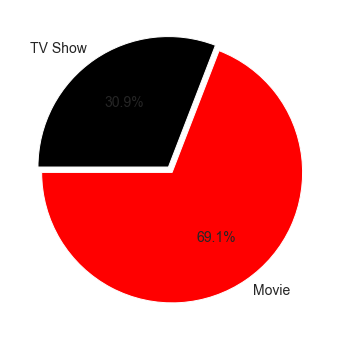

In [61]:
plt.figure(figsize=(12,6))
g = plt.pie(Mdata.type.value_counts(),explode=(0.025,0.025), 
            labels=Mdata.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

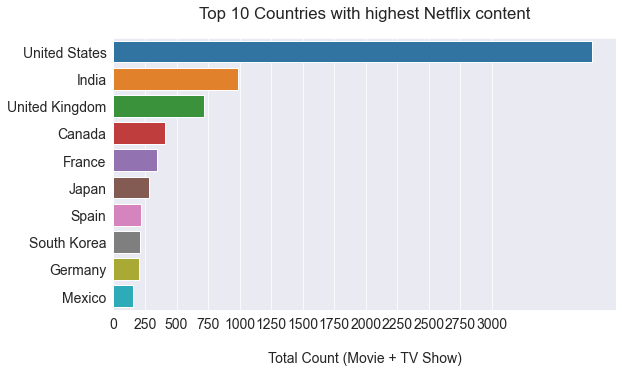

In [62]:
Country_Content_contrib=pd.Series(Mdata.country.str.split(', ').sum()).value_counts()

#Taking top 10
countries = Country_Content_contrib.head(10).index
Content_count = Country_Content_contrib.head(10).values
sns.barplot(y=countries,x=Content_count);
plt.title("Top 10 Countries with highest Netflix content",y=1.05);
plt.xlabel('Total Count (Movie + TV Show)',labelpad=20);
plt.xticks(range(0,3250,250));

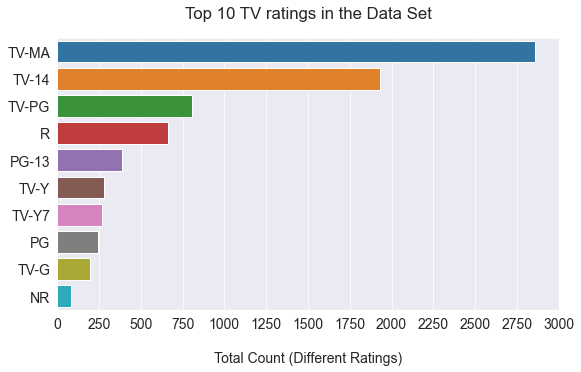

In [64]:
Genre_Contribution=pd.Series(Mdata.rating.str.split(', ').sum()).value_counts()

#Taking top 10
rating = Genre_Contribution.head(10).index
Content_count = Genre_Contribution.head(10).values
sns.barplot(y=rating,x=Content_count);
plt.title("Top 10 TV ratings in the Data Set",y=1.05);
plt.xlabel('Total Count (Different Ratings)',labelpad=20);
plt.xticks(range(0,3250,250));

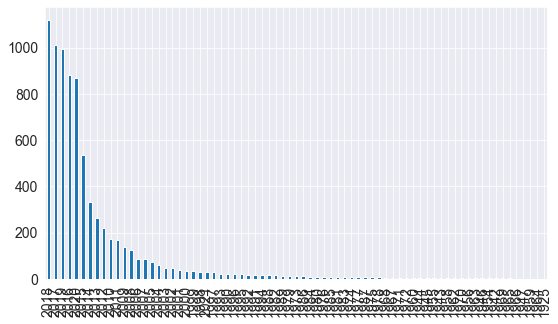

In [71]:
Mdata['release_year'].value_counts().plot(kind='bar')

In [77]:
import numpy as np
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'